# Load Data

In [1]:
#import pyeeg
#import pyedflib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import mne
#import mne_features
#from scipy import signal
#import csv


In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s003_2013_01_04\00000355_s003.txt
C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s003_2013_01_04\00000355_s003_t000.edf
C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s003_2013_01_04\00000355_s003_t000.npy
C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s004_2013_02_04\00000355_s004.txt
C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s004_2013_02_04\00000355_s004_t000.edf
C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s004_2013_02_04\00000355_s004_t000.npy
C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s005_2013_02_04\00000355_s005.txt
C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s005_2013_02_04\00000355_s005_t000.edf
C:\Users\21655\Desktop\Semestre

## EEG files into list

In [3]:
def load_eeg_files(path): 
    fichiers=[] 
    for dirname, _, filenames in os.walk(path): 
        for filename in filenames: 
            fichiers.append(os.path.join(dirname, filename)) 
    edflist=[]
    for f in fichiers:
        if f.endswith(".edf"):
            edflist.append(f)
    
    return edflist

In [4]:
path1=r"C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar"
path2=r"C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\no_epilepsy\01_tcp_ar"
epilepsy_files=load_eeg_files(path1)
no_epilepsy_files=load_eeg_files(path2)

## Read raw_data :

In [5]:
files = []
raw_files=[]
for i in epilepsy_files:
    files.append([i,'epilepsy'])
    raw_files.append([i,'epilepsy'])
    
for i in no_epilepsy_files:
        files.append([i,'no_epilepsy'])
        raw_files.append([i,'no_epilepsy'])
    

In [6]:
for i in range(len(raw_files)):
    raw_files[i][0]=mne.io.read_raw_edf(raw_files[i][0])
    

Extracting EDF parameters from C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s003_2013_01_04\00000355_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s004_2013_02_04\00000355_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s005_2013_02_04\00000355_s005_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar\003\00000355\s005_2013_02_04\00000355_s005_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\

In [7]:
rec1=raw_files[0][0].copy()
rec1.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 36 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2013-01-04 09:16:52 UTC
 nchan: 36
 projs: []
 sfreq: 250.0 Hz
>

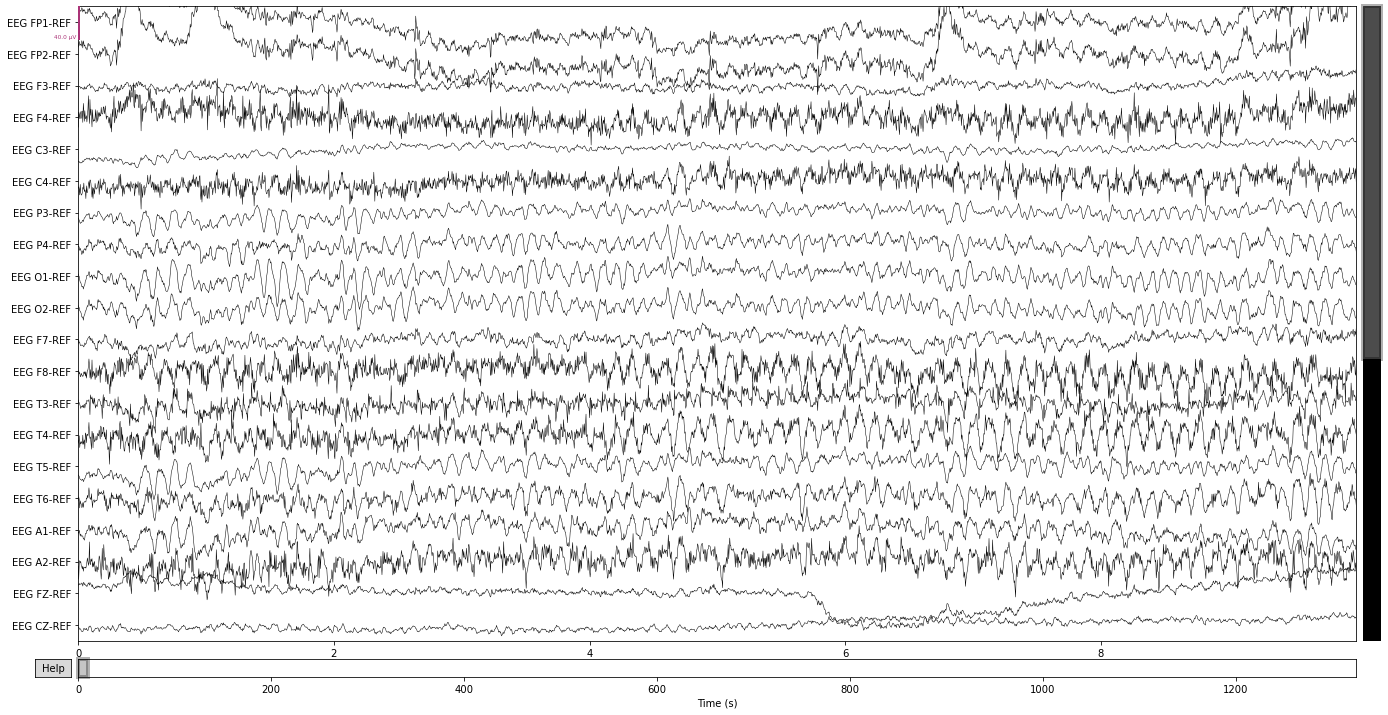

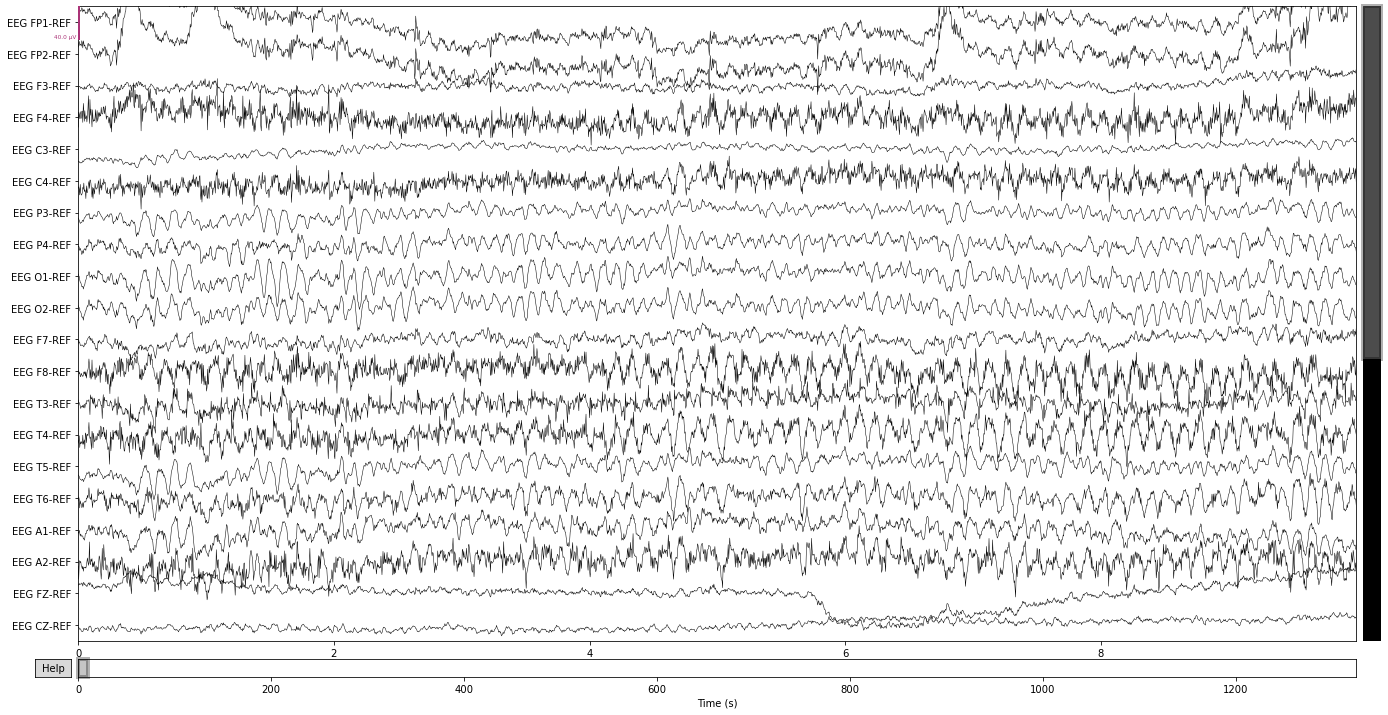

In [8]:
rec1.plot()

In [9]:
channels=rec1.ch_names
channels

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG ROC-REF',
 'EEG LOC-REF',
 'EEG EKG1-REF',
 'EMG-REF',
 'EEG 26-REF',
 'EEG 27-REF',
 'EEG 28-REF',
 'EEG 29-REF',
 'EEG 30-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'PHOTIC-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

In [10]:
len(channels)

36

Electrodes labled with:
* odd number --> left hemisphere
* even number --> right hemisphere
* FZ,CZ,PZ --> midline

Our baseline experiments focus only on the first 21 channels. 


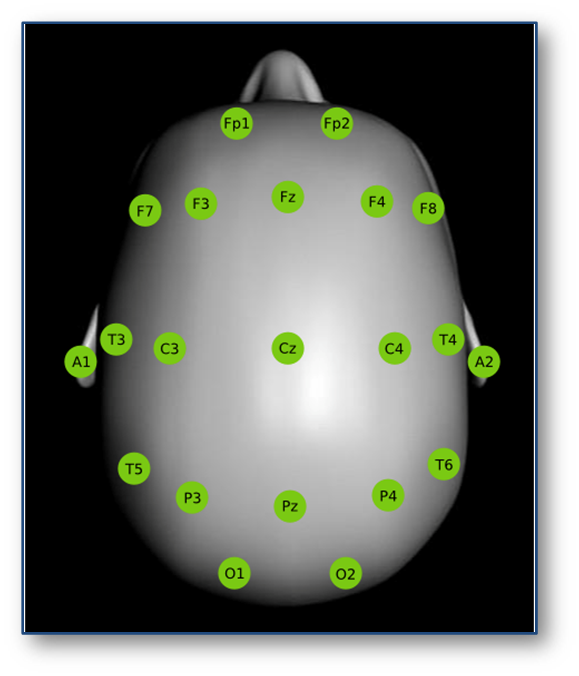

In [11]:
for i in range(len(raw_files)):
    raw_files[i][0]=raw_files[i][0].pick_channels(ch_names=['EEG FP1-REF','EEG FP2-REF','EEG F3-REF','EEG F4-REF','EEG C3-REF','EEG C4-REF','EEG P3-REF','EEG P4-REF','EEG O1-REF','EEG O2-REF','EEG F7-REF','EEG F8-REF','EEG T3-REF','EEG T4-REF','EEG T5-REF','EEG T6-REF','EEG A1-REF','EEG A2-REF','EEG FZ-REF','EEG CZ-REF','EEG PZ-REF'])
    

# Signal filter

In [12]:
def momentum (z):
  n_iter = len(z)
  beta = 0.9
  temp = np.zeros((len(z)))
  
  for k in range(1,n_iter-1):
    temp[k+1] = beta * temp[k] + (1-beta) * z[k] 
    
  return temp
  


## Testing filter for one signal

In [13]:
record1=raw_files[0][0].copy()

In [14]:
data=record1.get_data()
data

array([[ 1.35838116e-05,  1.89243836e-05,  1.99924980e-05, ...,
         3.50000000e-09,  3.50000000e-09,  3.50000000e-09],
       [ 9.15876627e-06,  1.26682850e-05,  1.61778038e-05, ...,
         3.50000000e-09,  3.50000000e-09,  3.50000000e-09],
       [-7.16812525e-06, -4.57413314e-06, -2.89566765e-06, ...,
         3.50000000e-09,  3.50000000e-09,  3.50000000e-09],
       ...,
       [ 6.25959862e-06,  7.63288856e-06,  8.39582742e-06, ...,
         3.50000000e-09,  3.50000000e-09,  3.50000000e-09],
       [-2.89566765e-06, -2.89566765e-06, -3.65860651e-06, ...,
         3.50000000e-09,  3.50000000e-09,  3.50000000e-09],
       [-9.60952959e-06, -1.17457584e-05, -1.29664606e-05, ...,
         3.50000000e-09,  3.50000000e-09,  3.50000000e-09]])

In [15]:
data.shape

(21, 331250)

In [16]:
data[0].shape

(331250,)

In [17]:
data_filt = np.zeros((data.shape[0],data.shape[1]))
for i in range(data.shape[0]):
    data_filt[i] = momentum(data[i])
    

In [18]:
data_filt

array([[ 0.00000000e+00,  0.00000000e+00,  1.89243836e-06, ...,
         3.49999977e-09,  3.49999979e-09,  3.49999981e-09],
       [ 0.00000000e+00,  0.00000000e+00,  1.26682850e-06, ...,
         3.49999975e-09,  3.49999978e-09,  3.49999980e-09],
       [ 0.00000000e+00,  0.00000000e+00, -4.57413314e-07, ...,
         3.50000007e-09,  3.50000006e-09,  3.50000006e-09],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  7.63288856e-07, ...,
         3.49999987e-09,  3.49999988e-09,  3.49999990e-09],
       [ 0.00000000e+00,  0.00000000e+00, -2.89566765e-07, ...,
         3.50000001e-09,  3.50000001e-09,  3.50000001e-09],
       [ 0.00000000e+00,  0.00000000e+00, -1.17457584e-06, ...,
         3.50000000e-09,  3.50000000e-09,  3.50000000e-09]])

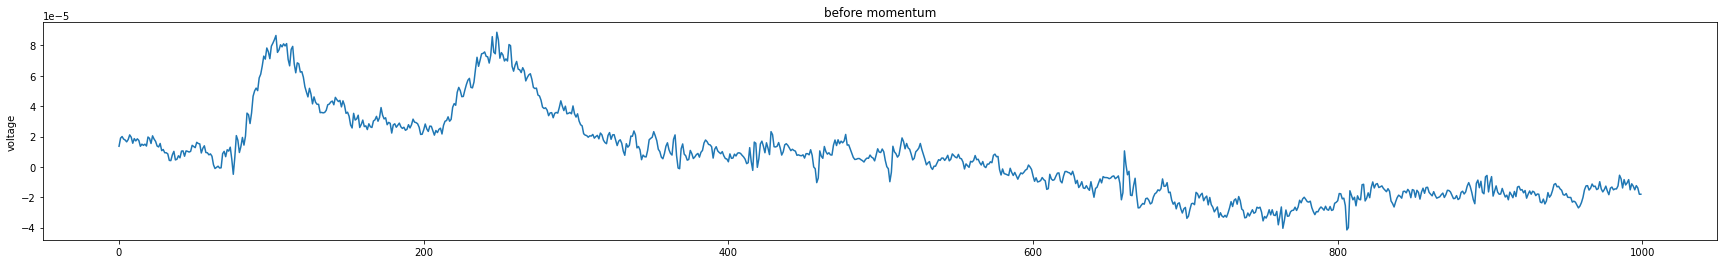

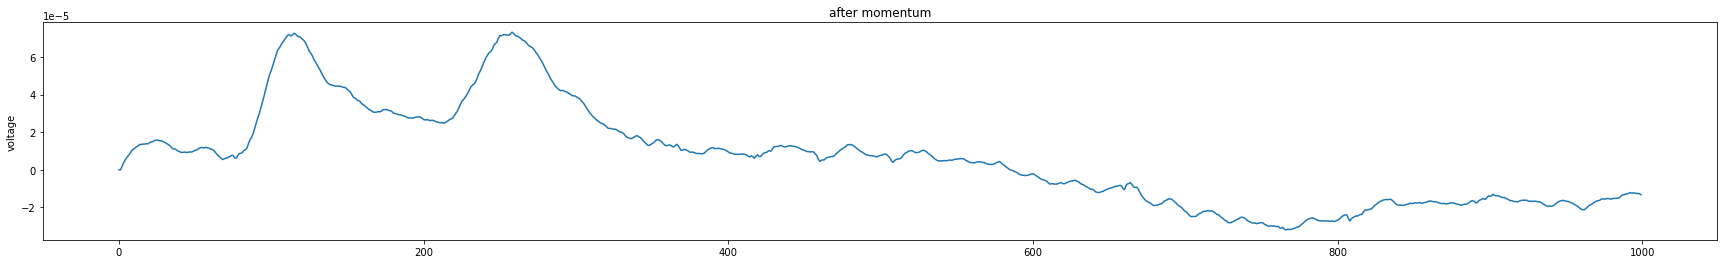

In [19]:

plt.figure(figsize=(30,4))
plt.title("before momentum")
plt.plot(data[0][0:1000])

plt.ylabel('voltage')
plt.show()



plt.figure(figsize=(30,4))
plt.title("after momentum")
plt.plot(data_filt[0][0:1000])

plt.ylabel('voltage')
plt.show()

## Applying filter for all signals

In [20]:
def apply_filter(filt,data):
    data_filt = np.zeros((data.shape[0],data.shape[1]))
    for i in range(data.shape[0]):
        data_filt[i] = filt(data[i])
    
    return data_filt
    

In [21]:
data2=apply_filter(momentum,data)

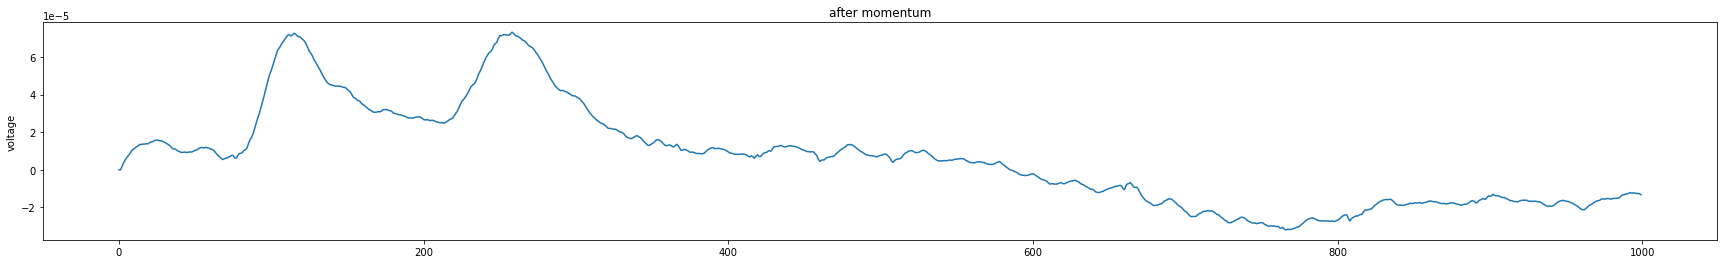

In [22]:
plt.figure(figsize=(30,4))
plt.title("after momentum")
plt.plot(data2[0][0:1000])

plt.ylabel('voltage')
plt.show()

In [48]:
raw_filter=[]

In [49]:
### generate filtred signal ###

for i in range(1252,len(raw_files)):
    raw_filter.append([apply_filter(momentum,raw_files[i][0].get_data()),raw_files[i][1]])

In [50]:
### storing filtred signal ###
for i in range(len(raw_filter)):
    path=files[i+1252][0][:len(files[i+1252][0])-4]
    np.save(path,raw_filter[i][0])

In [41]:
len(raw_filter)

50

## EEG filtred into list

In [29]:
def load_filtred_files(path): 
    fichiers=[] 
    for dirname, _, filenames in os.walk(path): 
        for filename in filenames: 
            fichiers.append(os.path.join(dirname, filename)) 
    edflist=[]
    for f in fichiers:
        if f.endswith(".npy"):
            edflist.append(f)
    
    return edflist

In [30]:
path1=r"C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\epilepsy\01_tcp_ar"
path2=r"C:\Users\21655\Desktop\Semestre2\Projet DS\data\edf\no_epilepsy\01_tcp_ar"
epilepsy_filtred_files=load_filtred_files(path1)
no_epilepsy_filtred_files=load_filtred_files(path2)

## Read filtred_data :

In [31]:
filtred_files = []

for i in epilepsy_filtred_files:
    filtred_files.append([i,'epilepsy'])
        
for i in no_epilepsy_filtred_files:
    filtred_files.append([i,'no_epilepsy'])
           

In [ ]:
# for i in range(len(filtred_files)):
#     filtred_files[i][0]=np.load(filtred_files[i][0])
    

In [32]:
test1=raw_files[500][0].get_data()

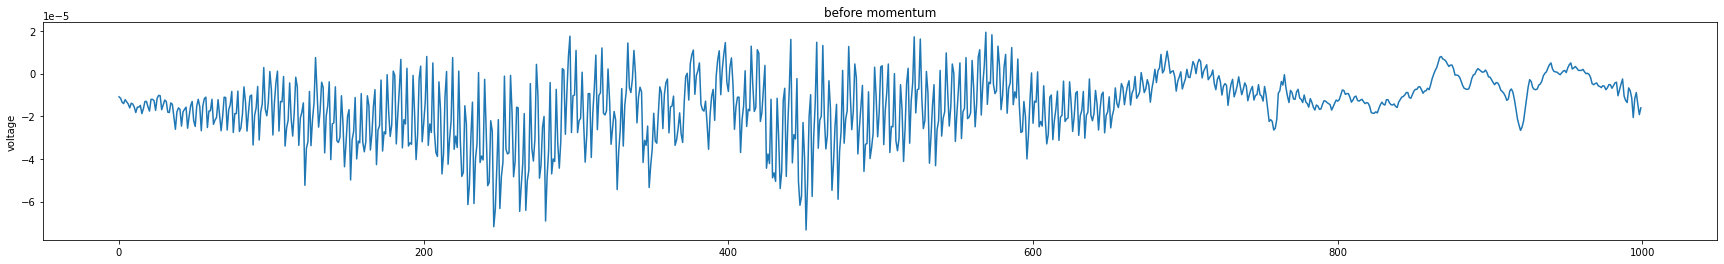

In [33]:
plt.figure(figsize=(30,4))
plt.title("before momentum")
plt.plot(test1[0][0:1000])

plt.ylabel('voltage')
plt.show()

In [34]:
test2=apply_filter(momentum,test1)

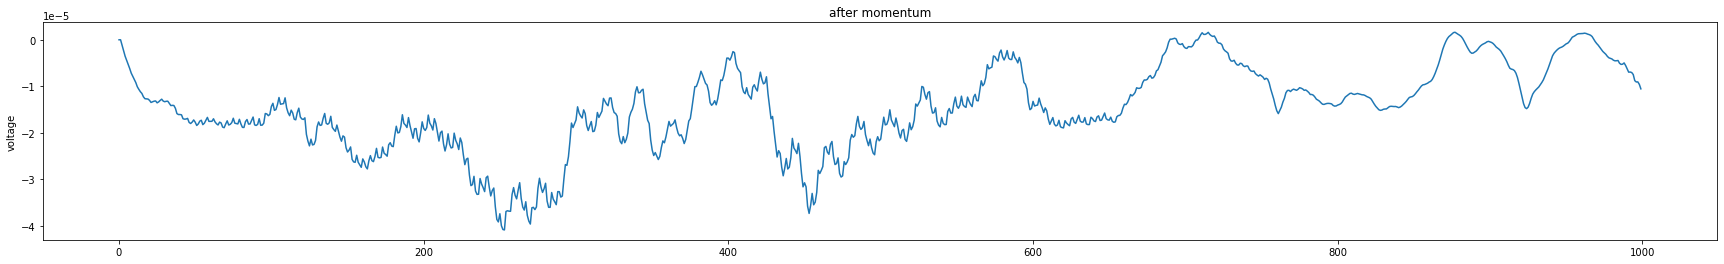

In [35]:
plt.figure(figsize=(30,4))
plt.title("after momentum")
plt.plot(test2[0][0:1000])

plt.ylabel('voltage')
plt.show()

In [36]:
test3=np.load(filtred_files[500][0])

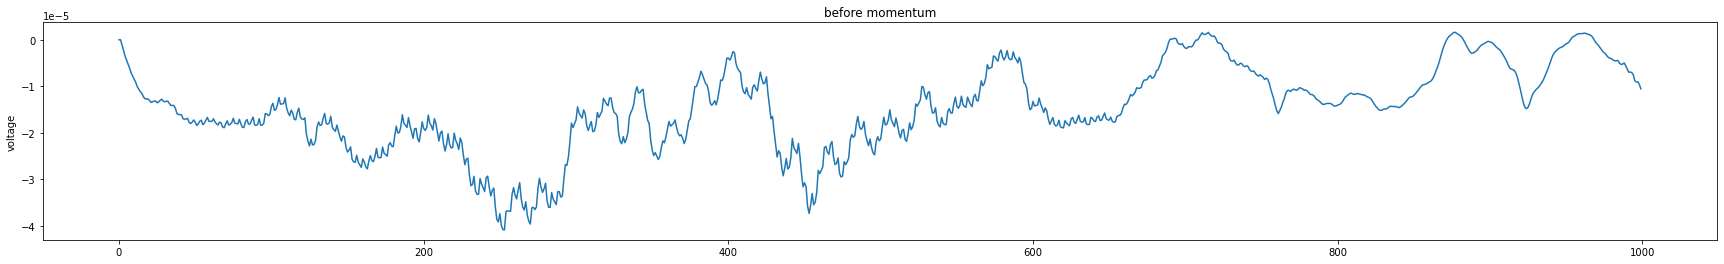

In [37]:
plt.figure(figsize=(30,4))
plt.title("before momentum")
plt.plot(test3[0][0:1000])

plt.ylabel('voltage')
plt.show()